In [49]:
import json
import matplotlib.pyplot as plt
import glob
import numpy as np


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

# set up figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 22})


<IPython.core.display.Javascript object>

In [50]:
ref_data_dir = '/Users/lantonel/SilverTongue/training_dataset/'
user_data_dir = '/Users/lantonel/SilverTongue/fellow_dataset/'
reference_inputs = [file for file in glob.glob(ref_data_dir + '*.json') if '_unknown_words' not in file]
#reference_inputs = reference_inputs[:10]
user_urls = ['evewg5TAdfc', # jamie week 2 demo
             'J7DyWcA5U48', # jamie week 1 demo
             'U4rGFXM0Z4I', # sean week 2 demo
             'U3T2eI_5VOE', # wes week 2 demo
             'YckvYUlESxs', # denis week 2 demo
             'ZCGEMI3Saug', # patrick week 2 demo
            ]
user_labels = ['Jamie 2',
               'Jamie 1',
               'Sean 2',
               'Wes 2',
               'Denis 2',
               'Patrick 2',
              ]
user_inputs = [user_data_dir+user_url+'.json' for user_url in user_urls]

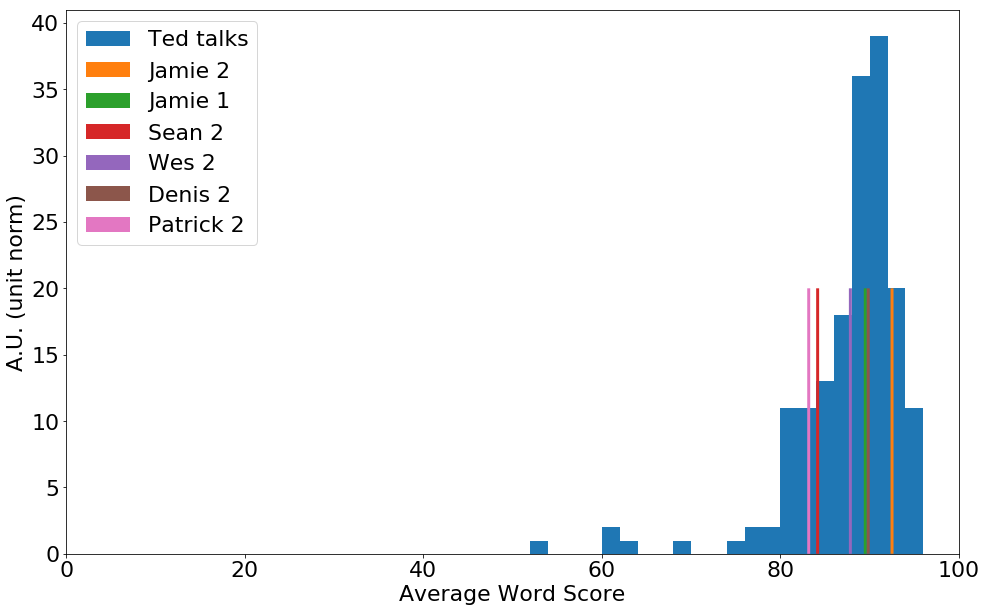

<IPython.core.display.Javascript object>

In [78]:
%%notify

means = []
# make distribution of word scores
for i, ref in enumerate(reference_inputs):
    #print i
    with open(ref) as json_data:
        data = json.load(json_data)
    word_scores = [word["quality"] for word in data if word["quality"] > 0]
#    word_scores = [word["quality"] for word in data]
    mean = np.mean(word_scores)
    if not np.isnan(mean):
        means.append(mean)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plot = plt.hist(means, 
                50, 
                range=[0, 100], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label='Ted talks'
               )
    
for i, ref in enumerate(user_inputs):
    #print i
    with open(ref) as json_data:
        data = json.load(json_data)
    word_scores = [word["quality"] for word in data if word["quality"] > 0]
#    word_scores = [word["quality"] for word in data]

    mean = np.mean(word_scores)

    plot = plt.hist([mean], 
                300, 
                range=[0, 100], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                weights = [20],
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label=user_labels[i]
               )

leg = plt.legend(loc=2)
axes = plt.gca()
axes.set_xlabel("Average Word Score")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,100)
plt.show()

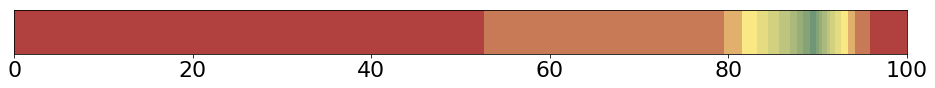

In [71]:
# want to plot percentile for mean +-25%,+-50%,+-75%,+-100%, rest
#red -> pink
#colors = ['#e9cbca','#dba8a7','#cc8684','#be6361','#b0413e']
#blue -> gray
#colors = ['#B3B3B3','#AAAEB1','#A1A8AE','#97A3AC','#8E9EA9','#8599A7','#7C93A5','#738EA2','#6989A0','#60839D','#577E9B']

# red -> yellow -> green
#colors = ['#B0413E','#BF624C','#CD845A','#DCA568','#EAC776','#F9E884','#DED881','#C2C87E','#A7B77B','#8BA778','#709775']
colors = ['#B0413E','#C87955','#E1B06D','#F9E884','#E5DC82','#D2D180','#BEC57E','#ABBA7B','#97AE79','#84A377','#709775']

colors.extend(list(reversed(colors)))
center = np.percentile(means, 50)
bin_percentiles = [(100./(len(colors)-2))*i for i in range(len(colors)-1)]
bin_edges = [np.percentile(means, i) for i in bin_percentiles]
widths = [bin_edges[0]]
for i in range(1,len(bin_edges)):
    widths.append(bin_edges[i]-bin_edges[i-1])
widths.append(100-bin_edges[-1])
weights = [[width] for width in widths]
data = [[1] for width in widths]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 0.8
plt.rcParams["figure.figsize"] = fig_size

plt.hist(data, weights = weights, bins=1, color = colors, orientation="horizontal", stacked=True)
ax = plt.gca()
ax.set_xlim(0,100)
ax.set_ylim(0.8,1.2)
ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

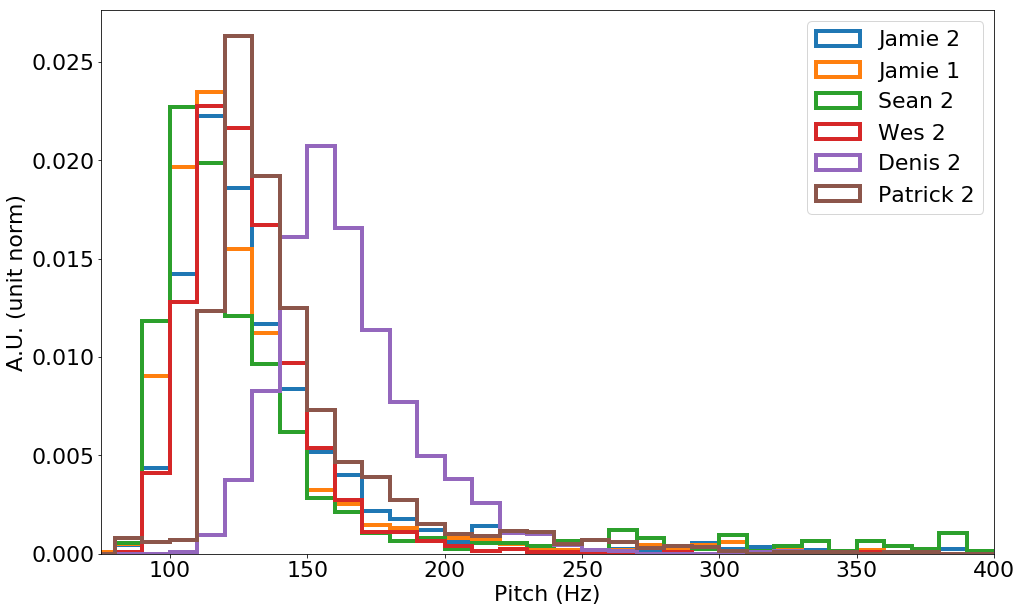

In [72]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

for i, ref in enumerate(user_inputs):
    #print i
    with open(ref) as json_data:
        data = json.load(json_data)
    pitches = [(syl["pitch_high"]+syl['pitch_low'])/2. for word in data 
                for syl in word["syllables"] 
                if syl["quality"] > 0
                if syl["pitch_high"]+syl['pitch_low'] > 0]
    plot = plt.hist(pitches, 
                50, 
                range=[0, 500], 
                histtype='step',
                stacked=False,
                alpha=1,
                #weights = [10],
                normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                linewidth=4,
                label=user_labels[i]
               )

leg = plt.legend(loc=1)
axes = plt.gca()
axes.set_xlabel("Pitch (Hz)")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(75,400)
plt.show()

0.295737732096
0.297019456626
0.430449043761
0.187016053699
0.155996402026
0.2458304877


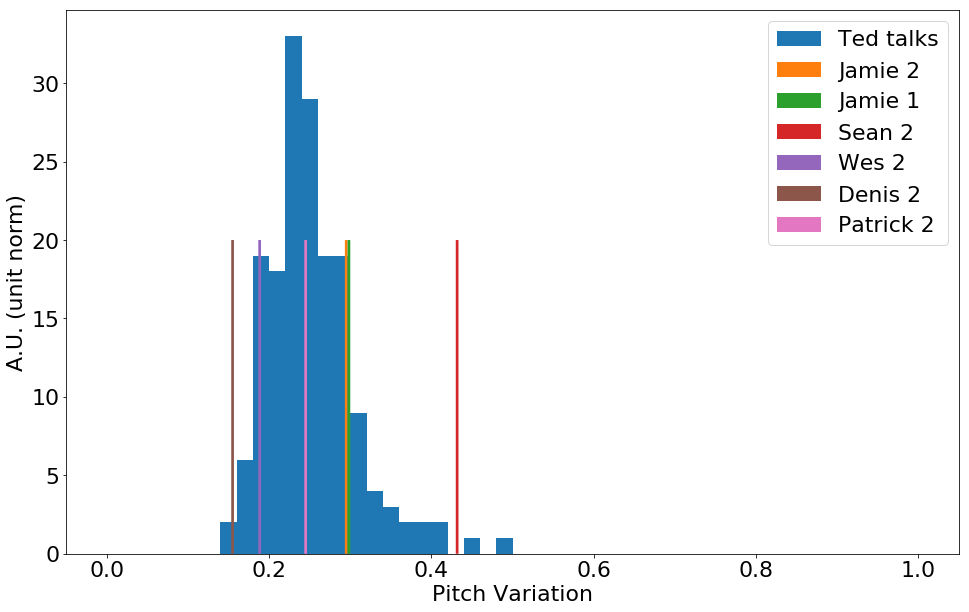

<IPython.core.display.Javascript object>

In [80]:
%%notify

variations = []
variation_max = 1
# make distribution of pitch variation
for i, ref in enumerate(reference_inputs):
    #if i > 20:
    #    break
    with open(ref) as json_data:
        data = json.load(json_data)
    pitches = [(syl["pitch_high"]+syl['pitch_low'])/2. for word in data 
                for syl in word["syllables"] 
                if syl["quality"] > 0
                if syl["pitch_high"]+syl['pitch_low'] > 0]
    rms = np.std(pitches)
    mean = np.mean(pitches)
    if not np.isnan(rms) and not np.isnan(mean):
        variations.append(rms/mean)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plot = plt.hist(variations, 
                50, 
                range=[0, variation_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label='Ted talks'
               )
    
for i, ref in enumerate(user_inputs):
    #print i
    with open(ref) as json_data:
        data = json.load(json_data)
    pitches = [(syl["pitch_high"]+syl['pitch_low'])/2. for word in data 
                for syl in word["syllables"] 
                if syl["quality"] > 0
                if syl["pitch_high"]+syl['pitch_low'] > 0]
    rms = np.std(pitches)
    mean = np.mean(pitches)
    variation = rms/mean
    print variation
    plot = plt.hist([variation], 
                300, 
                range=[0, variation_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                weights = [20],
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label=user_labels[i]
               )

leg = plt.legend(loc=1)
axes = plt.gca()
axes.set_xlabel("Pitch Variation")
axes.set_ylabel("A.U. (unit norm)")
ax.set_xlim(0,variation_max)
#ax.set_xlim(0,0.5)
plt.show()

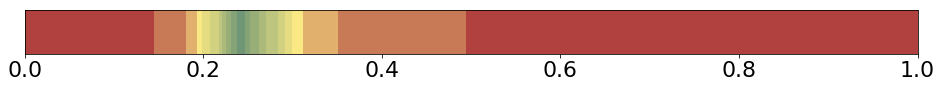

In [77]:
colors = ['#B0413E','#C87955','#E1B06D','#F9E884','#E5DC82','#D2D180','#BEC57E','#ABBA7B','#97AE79','#84A377','#709775']

colors.extend(list(reversed(colors)))
center = np.percentile(variations, 50)
bin_percentiles = [(100./(len(colors)-2))*i for i in range(len(colors)-1)]
bin_edges = [np.percentile(variations, i) for i in bin_percentiles]
widths = [bin_edges[0]]
for i in range(1,len(bin_edges)):
    widths.append(bin_edges[i]-bin_edges[i-1])
widths.append(variation_max-bin_edges[-1])
weights = [[width] for width in widths]
data = [[1] for width in widths]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 0.8
plt.rcParams["figure.figsize"] = fig_size

plt.hist(data, weights = weights, bins=1, color = colors, orientation="horizontal", stacked=True)
ax = plt.gca()
ax.set_xlim(0,variation_max)
ax.set_ylim(0.8,1.2)
ax.get_yaxis().set_visible(False)
#ax.get_xaxis().set_visible(False)
plt.show()